# OpenCV Videos

Avec OpenCV, il est également possible de faire du traitement vidéos. Dans ce cas là, une vidéo peut-être representée comme une succession d'images.

L'exemple en dessous montre comment charger une vidéo, récupérer les frames la constituant, et écrire une nouvelle vidéo.

In [2]:
%matplotlib inline  

import numpy as np
import cv2
import matplotlib.pyplot as plt

## Exercice 1 :

Pour l'instant, le code ci-dessous recopie la première vidéo dans un nouveau fichier. Faites en sorte que la nouvelle vidéo ne contienne que les secondes 5 à 10 de la première vidéo.

In [3]:
cap = cv2.VideoCapture('data/highway_camera_15.mp4')
print("frames : %d" % cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("fps : %d" % cap.get(cv2.CAP_PROP_FPS))
print("width : %d" % cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print("height : %d" % cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter(
    'data/highway_camera_5.mp4',
    fourcc,
    cap.get(cv2.CAP_PROP_FPS),
    (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
)

ret, frame = cap.read()  # Capture frame par frame
while(frame is not None):

    # Convertir l'image en niveaux de gris
    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    ## ----- TODO : Faire en sorte que la nouvelle vidéo créée ne soit constituée que des secondes 5 à 10 de la première vidéo ----- ##
    ## ----------------------------------------------------------------------------------------------------------------------------- ##
    
    # Ecrire l'image
    out.write(frame)
    # Afficher l'image
    cv2.imshow('frame', frame)
    
    ret, frame = cap.read()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Ferme tout
cap.release()
out.release()
cv2.destroyAllWindows()

frames : 450
fps : 29
width : 1280
height : 720


Il est possible de soustraire deux images pour voir apparaitre les différences.

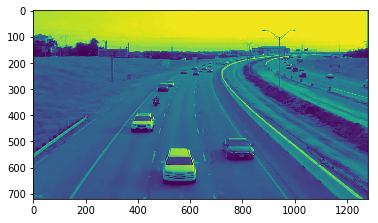

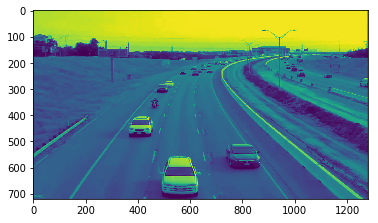

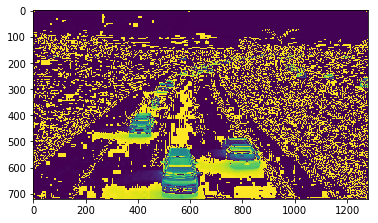

In [4]:
cap = cv2.VideoCapture('data/highway_camera_15.mp4')
_, frame1 = cap.read()
_, frame2 = cap.read()
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
diff = frame2 - frame1

# print(frame1[0])
# print("-----")
# print(frame2[0])
# print("-----")
# print(diff[0])

plt.figure()
plt.imshow(frame1)

plt.figure()
plt.imshow(frame2)

plt.figure()
plt.imshow(diff)

cap.release()

Pourquoi y a-t-il autant de pixels colorés ?

Observez les valeurs de frame1 et frame2. Nos valeurs sont codés sur 8 bits, on observe donc un overflow... En convertissant les images sur 16 bits, le problème est résolu !

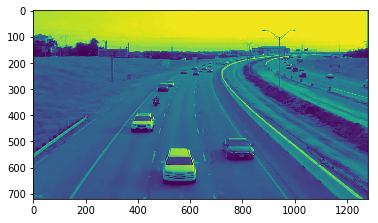

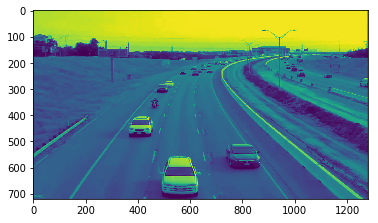

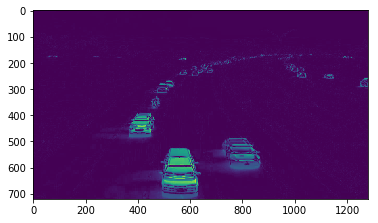

In [5]:
frame1_16 = np.int16(frame1)
frame2_16 = np.int16(frame2)
diff_16 = np.abs(frame2_16 - frame1_16)

plt.figure()
plt.imshow(frame1_16)

plt.figure()
plt.imshow(frame2_16)

plt.figure()
plt.imshow(diff_16)

C'est mieux ! Mais il reste des impuretés causées par les petites voitures... Nous pouvons les nettoyer en moyennant l'image et en appliquant un seuillage.

[197 197 196 ... 221 221 221]
-----
[197 197 196 ... 221 221 221]
-----
[0 0 0 ... 0 0 0]


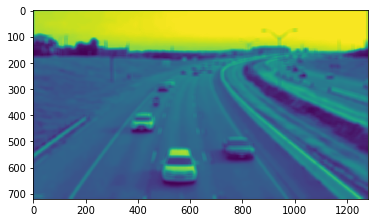

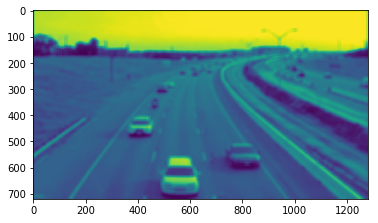

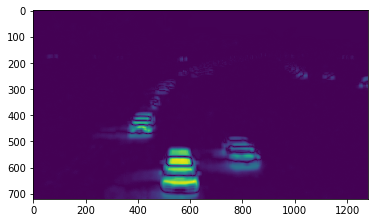

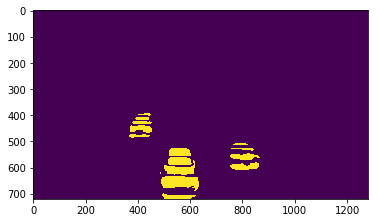

In [6]:
frame1_blurred = cv2.blur(frame1_16,(15,15))
frame2_blurred = cv2.blur(frame2_16,(15,15))
diff_blurred = np.abs(frame2_blurred - frame1_blurred)

print(frame1_blurred[0])
print("-----")
print(frame2_blurred[0])
print("-----")
print(diff_blurred[0])

plt.figure()
plt.imshow(frame1_blurred)

plt.figure()
plt.imshow(frame2_blurred)

plt.figure()
plt.imshow(diff_blurred)

diff_float_32 = np.float32(diff_blurred)  # Threshold demande du float32
_, diff_thresh = cv2.threshold(diff_float_32, 50, 255, cv2.THRESH_BINARY)

plt.figure()
plt.imshow(diff_thresh)

Ça a l'air beaucoup mieux ! Comptons maintenant nos voitures sur l'image !

In [7]:
diff_thresh_8 = np.uint8(diff_thresh)  # ConnectedComponents demande du int8
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(diff_thresh_8, connectivity=4)
print("number of elements : %d" % len(centroids))

number of elements : 17


17 voitures... C'est beaucoup ! En réalité, notre masque de voitures n'est pas vraiment propre. Nous pouvons effectuer des erosions et des dilatations pour récupérer un masque correcte.

## Exercice 2

Changer les valeurs des kernels et le nombre d'iteration, puis recomptez le nombre de voitures jusqu'à en voir s'afficher le nombre souhaité.
Vous pouvez égalemnt dessiner sur l'image un marqueur pour voir quels composants connectés la fonction de opencv a extrait.

number of elements : 4
[[642.85877363 345.2270243 ]
 [413.44791142 451.03707432]
 [562.30853655 622.95821868]
 [808.74248862 581.30288316]]


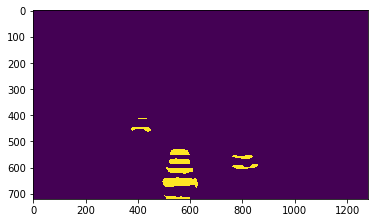

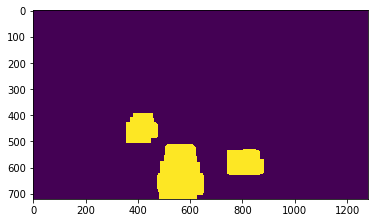

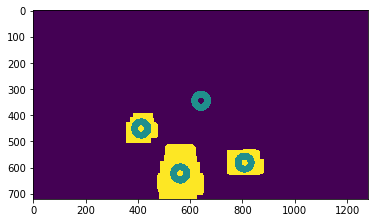

In [11]:
# On peut eroder/dilater l'image pour diminuer le nombre d'élements connectés


## ----- TODO : Changer les valeurs des kernels et/ou le nombre d'itérations pour obtenir le bon nombre de voitures ----- ##
erosion_kernel = np.ones((1, 1),np.uint8)
erosion = cv2.erode(diff_thresh_8, erosion_kernel, iterations = 1)
plt.figure()
plt.imshow(erosion)

dilation_kernel = np.ones((1, 1),np.uint8)
dilation = cv2.dilate(erosion, dilation_kernel, iterations = 1)
plt.figure()
plt.imshow(dilation)
## ------------------------------------------------------------------------------------------------------------------- ##

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(dilation, connectivity=4)
print("number of elements : %d" % len(centroids))
print(centroids)

## ----- TODO : Afficher sur l'image le centre des composantes connexes trouvées par openCV ----- ##
## ---------------------------------------------------------------------------------------------- ##